In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

# Fetch the "google_review_ratings" dataset from the UCI Machine Learning Repository
characters = fetch_openml(name='google_review_ratings', version=1, as_frame=True)

# Extract the feature matrix X and target vector y
X = characters.data.values
y = characters.target.values

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

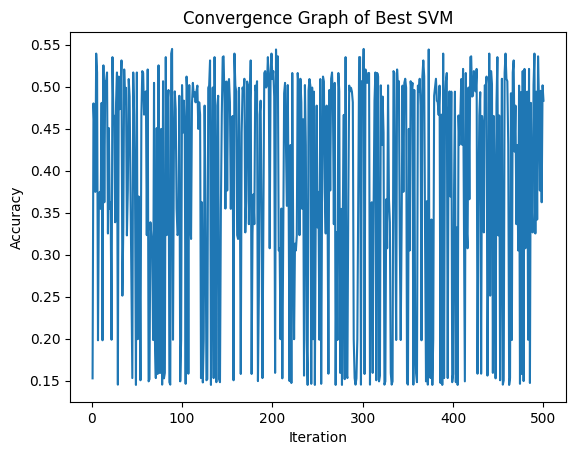

Best accuracy for sample 499: 0.5450097847358122
Best hyperparameters for sample : kernel=rbf, nu=0.2 , epsilon=0.1



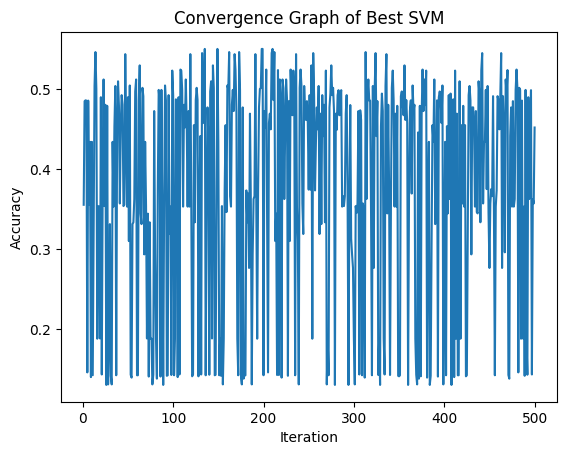

Best accuracy for sample 499: 0.5499021526418787
Best hyperparameters for sample : kernel=rbf, nu=0.30000000000000004 , epsilon=0.1



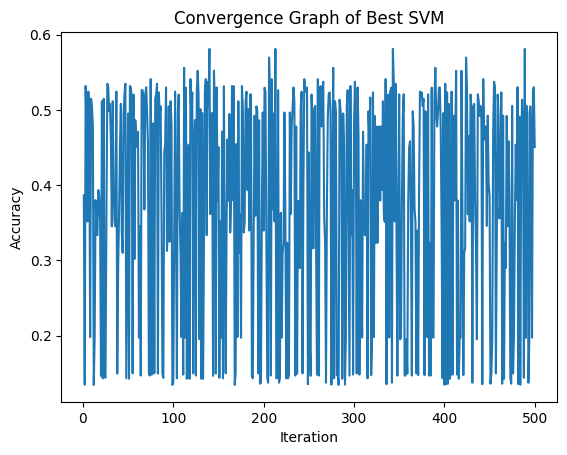

Best accuracy for sample 499: 0.5808871493803001
Best hyperparameters for sample : kernel=rbf, nu=0.2 , epsilon=0.1

Best accuracy for sample 499: 0.5453359425962165
Best hyperparameters for sample : kernel=rbf, nu=0.1 , epsilon=0.1

Best accuracy for sample 499: 0.5580560991519896
Best hyperparameters for sample : kernel=rbf, nu=0.2 , epsilon=0.2

Best accuracy for sample 499: 0.5424005218525767
Best hyperparameters for sample : kernel=rbf, nu=0.30000000000000004 , epsilon=0.4

Best accuracy for sample 499: 0.5688193085453359
Best hyperparameters for sample : kernel=rbf, nu=0.2 , epsilon=0.1

Best accuracy for sample 499: 0.5547945205479452
Best hyperparameters for sample : kernel=rbf, nu=0.2 , epsilon=0.1

Best accuracy for sample 499: 0.5753424657534246
Best hyperparameters for sample : kernel=rbf, nu=0.2 , epsilon=0.2

Best accuracy for sample 499: 0.5557729941291585
Best hyperparameters for sample : kernel=rbf, nu=0.2 , epsilon=0.1



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

for i in range(10):

    best_params = []
    max_accuracy = -1
    svm = SVC(kernel='rbf')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    # define the range of hyperparameters to search over
    kernel_list = ['linear', 'rbf', 'poly', 'sigmoid']
    C_range = np.logspace(-3, 3, 7)
    gamma_range = np.logspace(-3, 3, 7)

    # initialize the best accuracy to be negative infinity
    best_accuracy = -1

    accuracies = []

    for i in range(500):
        # sample random hyperparameters from the ranges
        kernel = np.random.choice(kernel_list)
        C = np.random.choice(C_range)
        gamma = np.random.choice(gamma_range)
        
        # train the SVM with the current hyperparameters
        clf = SVC(kernel=kernel, C=C, gamma=gamma)
        clf.fit(X_train, y_train)

        # evaluate the accuracy on the test set
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # update the best hyperparameters if the current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = kernel
            best_C = C
            best_gamma = gamma

    # update the overall best hyperparameters if the current accuracy is higher
    if best_accuracy > max_accuracy:
        max_accuracy = best_accuracy
        best_params = [best_kernel, best_C, best_gamma]

    # plot the convergence graph for the sample with the maximum accuracy
    if best_accuracy == max_accuracy:
        plt.plot(range(1, 501), accuracies)
        plt.xlabel('Iteration')
        plt.ylabel('Accuracy')
        plt.title('Convergence Graph of Best SVM')
        plt.show()

    print(f"Best accuracy for sample : {best_accuracy}")
    print(f"Best hyperparameters for sample : kernel={best_kernel}, nu={best_C}, epsilon={best_gamma}\n")